# **Face Recognition**

This is an attempt at building face recognizers using pretrained models which are used for face detection from images and feature extraction 

Input ID Image -> Face Detection -> Facial features extraction -> storing features.

Input test Image -> Face Detection -> Facial features extraction -> Comparison with given list to obtain image

Kindly adjust adjust the directories when running on your own.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## **Header Files**

Importing all necessary functions and headers

In [0]:
import dlib
import scipy.misc
import numpy as np
import os
from matplotlib.pyplot import imread
from IPython.display import Image, display

In [3]:
os.listdir('/content/drive/My Drive/Projects/Face Recognition/')

['data',
 'dlib_face_recognition_resnet_model_v1.dat',
 'shape_predictor_68_face_landmarks.dat',
 'haarcascade_frontalface_default.xml',
 'Face-Rec.ipynb']

## **Assistive functions**

We are creating all the necessary functions which will be used in further part of the code



1.  **face_detector** : uses library function from dlib to detect the faces in the image
2.   **shape_predictor** : helps detecting the landmark points in face and understand the pose/angle of the face. It uses a pretrained model which has been attached in the github repo
3.   **face_recognition_model**: helps in extracting facial features to identify a particular person. It uses a pretrained model which has been attached in the github repo.






In [0]:
face_detector = dlib.get_frontal_face_detector()

shape_predictor = dlib.shape_predictor('/content/drive/My Drive/Projects/Face Recognition/shape_predictor_68_face_landmarks.dat')

face_recognition_model = dlib.face_recognition_model_v1('/content/drive/My Drive/Projects/Face Recognition/dlib_face_recognition_resnet_model_v1.dat')

TOLERANCE = 0.6 #Hyperparameter

## **Custom Functions**


In [0]:
def get_face_encodings(path_to_image):
    image = imread(path_to_image)
    detected_faces = face_detector(image, 1)
    # Get pose/landmarks of those faces
    # Will be used as an input to the function that computes face encodings
    # This allows the neural network to be able to produce similar numbers for faces of the same people, regardless of camera angle and/or face positioning in the image
    shapes_faces = [shape_predictor(image, face) for face in detected_faces]
    # For every face detected, compute the face encodings
    return [np.array(face_recognition_model.compute_face_descriptor(image, face_pose, 1)) for face_pose in shapes_faces]

In [0]:
def compare_face_encodings(known_faces, face):
    # Finds the difference between each known face and the given face (that we are comparing)
    # Calculate norm for the differences with each known face
    # Return an array with True/Face values based on whether or not a known face matched with the given face
    # A match occurs when the (norm) difference between a known face and the given face is less than or equal to the TOLERANCE value
    return (np.linalg.norm(known_faces - face, axis=1) <= TOLERANCE)

In [0]:
# This function returns the name of the person whose image matches with the given face (or 'Not Found')

def find_match(known_faces, names, face):
    # Call compare_face_encodings to get a list of True/False values indicating whether or not there's a match
    matches = compare_face_encodings(known_faces, face)
    # Return the name of the first match
    count = 0
    for match in matches:
        if match:
            return names[count]
        count += 1
    # Return not found if no match found
    return 'Not Found'

## **Database Creation**

Running the code through all the sample images present. 

**Note**: I've just made a small sample segment of a few images. The code could work on bigger datasets too.

In [0]:
image_filenames = filter(lambda x: x.endswith('.jpg'), os.listdir('/content/drive/My Drive/Projects/Face Recognition/data/train/All/'))
# Sort in alphabetical order
image_filenames = sorted(image_filenames)
# Get full paths to images
paths_to_images = ['/content/drive/My Drive/Projects/Face Recognition/data/train/All/' + x for x in image_filenames]
# List of face encodings we have
face_encodings = []
# Loop over images to get the encoding one by one
for path_to_image in paths_to_images:
    # Get face encodings from the image
    face_encodings_in_image = get_face_encodings(path_to_image)
    # Make sure there's exactly one face in the image
    if len(face_encodings_in_image) != 1:
        print("Please change image: " + path_to_image + " - it has " + str(len(face_encodings_in_image)) + " faces; it can only have one")
        exit()
    # Append the face encoding found in that image to the list of face encodings we have
    face_encodings.append(get_face_encodings(path_to_image)[0])

## **Testing Model**

The input image is processed and the output returns the image and the who it's bears most relevance to based on the comparison of facial features.

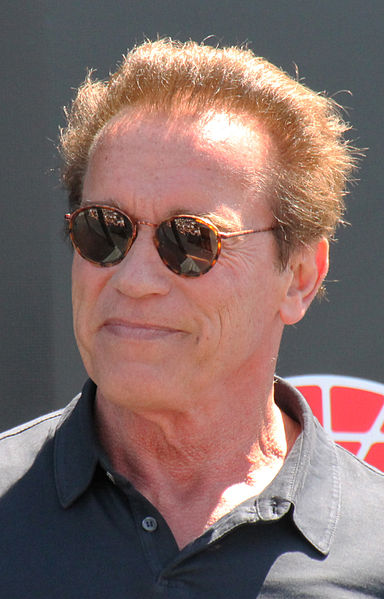

arnold



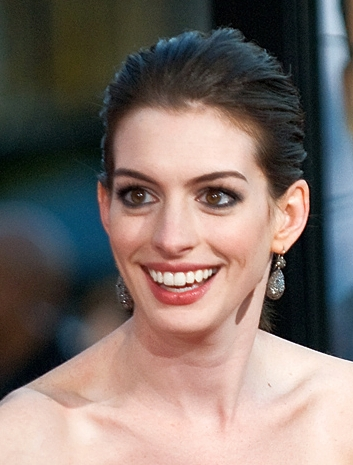

Not Found



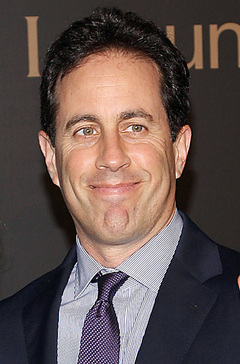

jerry



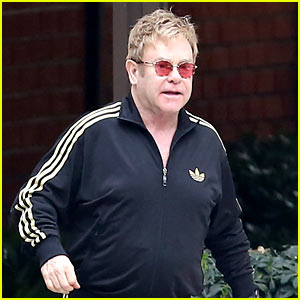

elton



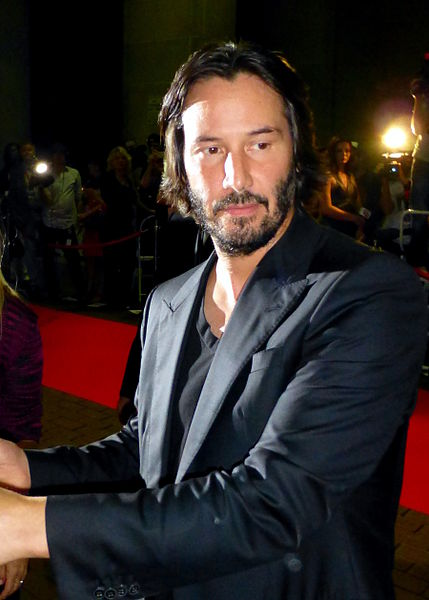

Keenu



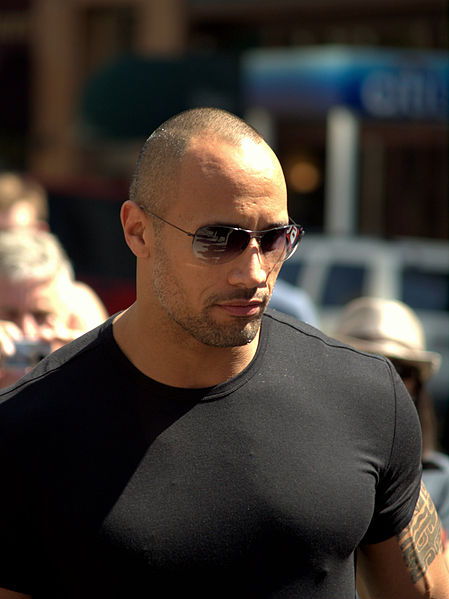

dwayne



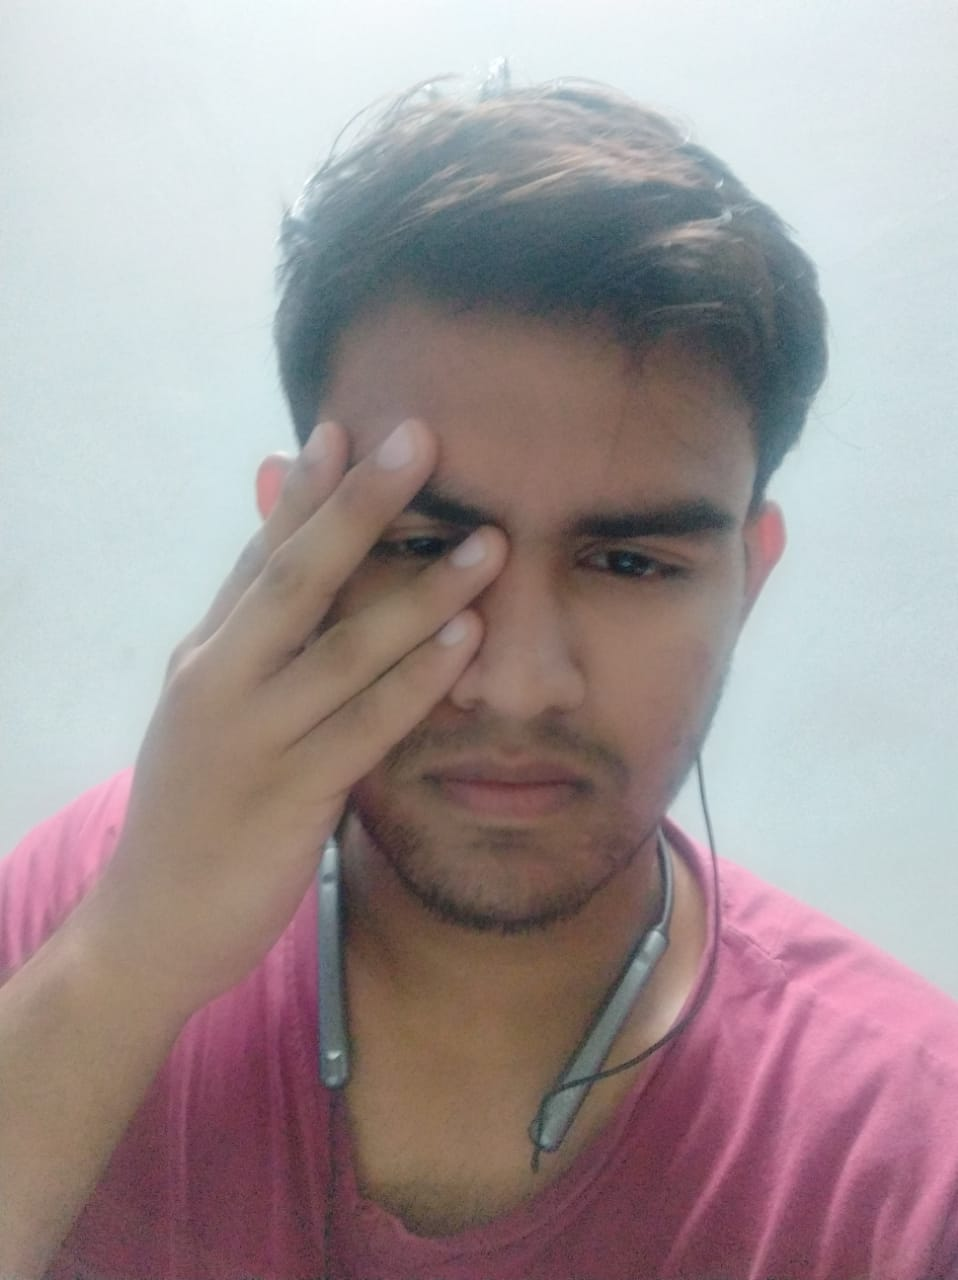

anish



In [9]:
# Get path to all the test images

test_filenames = filter(lambda x: x.endswith('.jpg'), os.listdir('/content/drive/My Drive/Projects/Face Recognition/data/val/testsamples/'))
# Get full paths to test images
paths_to_test_images = ['/content/drive/My Drive/Projects/Face Recognition/data/val/testsamples/' + x for x in test_filenames]
# Get list of names of people by eliminating the .JPG extension from image filenames
names = [x[:-4] for x in image_filenames]
# Iterate over test images to find match one by one
for path_to_image in paths_to_test_images:
    # Get face encodings from the test image
    face_encodings_in_image = get_face_encodings(path_to_image)
    # Make sure there's exactly one face in the image
    if len(face_encodings_in_image) != 1:
        print("Please change image: " + path_to_image + " - it has " + str(len(face_encodings_in_image)) + " faces; it can only have one")
        exit()
    # Find match for the face encoding found in this test image
    match = find_match(face_encodings, names, face_encodings_in_image[0])
    # Print the path of test image and the corresponding match
    display(Image(filename=path_to_image)) 
    print('\033[1m' + match )
    print()
